In [1]:
import sys
import os
import glob as gb
sys.path.append('/home/cbenitez/')
import MTmp as mt
import matplotlib.pyplot as plt
import numpy as np
import oort_cons as oc

amrviewer GUI ImportError : are WxPython and PyTables correctly installed?


In [2]:
from matplotlib.colors import LogNorm
import matplotlib.ticker as ticker

In [3]:
ops = [mt.rop(op=op,limits=(0.6,.85,0.375,0.625,0.375,0.625)) for op in [11,12,13,14]]

Computing hilbert minimal domain description for output 11 ...
Done !

 Succesfully read the output file 11. 

Computing hilbert minimal domain description for output 12 ...
Done !
Computing hilbert minimal domain description for output 12 ...
Done !

 Succesfully read the output file 12. 

Computing hilbert minimal domain description for output 13 ...
Done !
Computing hilbert minimal domain description for output 13 ...
Done !

 Succesfully read the output file 13. 

Computing hilbert minimal domain description for output 14 ...
Done !
Computing hilbert minimal domain description for output 14 ...
Done !

 Succesfully read the output file 14. 

Computing hilbert minimal domain description for output 15 ...
Done !


In [4]:
delta_grid = ops[1].zz[1]-ops[0].zz[0]
a_zz = [sum([op.dd[z,:,:] for z in range(op.nz/2-4,op.nz/2+4)])*delta_grid*mt.C.kpc.express(mt.C.cm) for op in ops]
#a_zz = [sum([op.dd[z,:,:] for z in range(op.nz)])*delta_grid*mt.C.kpc.express(mt.C.cm) for op in ops]
a_xlab = "$X$  [kpc]"
a_ylab = "$Y$  [kpc]"
a_zlab = r"$N$ [cm$^{-2}$]"
a_xlims = (5.5,9.5)
a_ylims = (-3,1)
a_zlims = (40e19,3e21)
a_extentto = [(op.x_min,op.x_max,op.y_min,op.y_max) for op in ops]

In [5]:
shrink=.7
fontsize=22

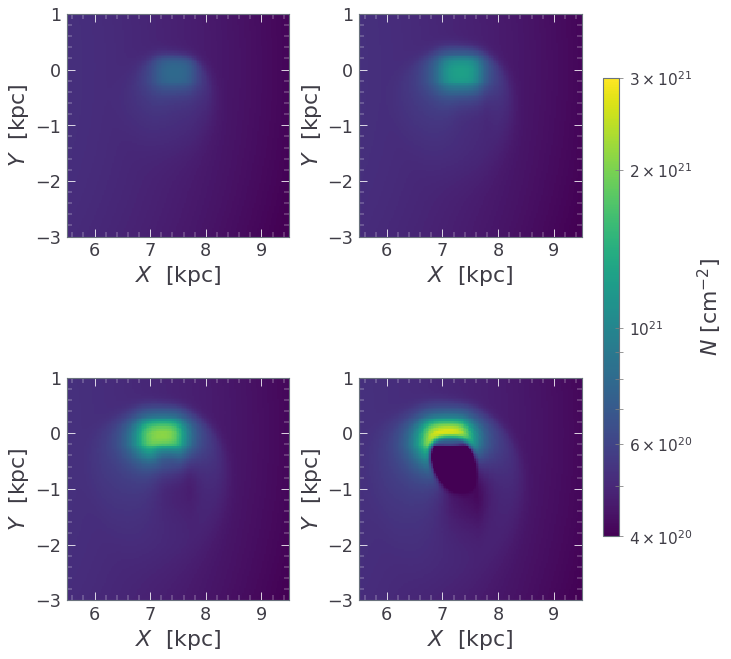

In [6]:
fig,axs = plt.subplots(2,2,figsize=(10,10),constrained_layout=True)
axsf = axs.flat
for i in range(len(axsf)):
    im = axsf[i].imshow(a_zz[i],extent=a_extentto[i],vmin=a_zlims[0], vmax=a_zlims[1],origin='lower',norm=LogNorm())
    
    axsf[i].set_xlabel(a_xlab,fontsize=fontsize)
    axsf[i].set_ylabel(a_ylab,fontsize=fontsize)
    #cbar = fig.colorbar(im,shrink = shrink)
    axsf[i].set_xlim(a_xlims[0],a_xlims[1])
    axsf[i].set_ylim(a_ylims[0],a_ylims[1])
    axsf[i].tick_params(which='major',direction='in',right=True,top=True,length=8,labelsize=fontsize*.8,color='white')
    axsf[i].minorticks_on()
    axsf[i].tick_params(which='minor',direction='in',right=True,top=True,length=5,color='white')


cbar = fig.colorbar(im, ax=axs[:, 1], shrink=shrink, location='right')
cbar.set_label(a_zlab, rotation=90,fontsize=fontsize)
cbar.ax.tick_params(labelsize=fontsize*.7,rotation=0,size=8,direction='inout',color='grey',which="major")
#fig.savefig("primer contacto.pdf", format='pdf',bbox_inches='tight')
plt.show()

In [7]:
ops[0].zz[op.nz/2-4]

-0.10500001977997364

In [8]:
delta_grid = ops[1].zz[1]-ops[0].zz[0]
a_zz = [op.dd[op.nz/2-1,:,:] for op in ops]
#a_zz = [sum([op.dd[z,:,:] for z in range(op.nz)])*delta_grid*mt.C.kpc.express(mt.C.cm) for op in ops]
a_xlab = "$X$  [kpc]"
a_ylab = "$Y$  [kpc]"
a_zlab = r"$N$ [cm$^{-2}$]"
a_xlims = (5.5,9.5)
a_ylims = (-3,1)
a_zlims = (.5,5)
a_extentto = [(op.x_min,op.x_max,op.y_min,op.y_max) for op in ops]

In [9]:
shrink=.8
fontsize=22

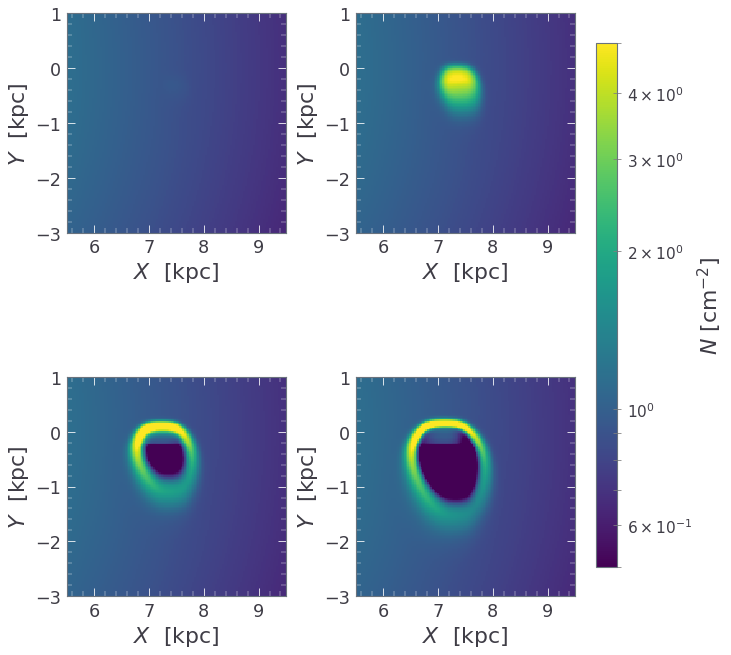

In [10]:
fig,axs = plt.subplots(2,2,figsize=(10,10),constrained_layout=True)
axsf = axs.flat
for i in range(len(axsf)):
    im = axsf[i].imshow(a_zz[i],extent=a_extentto[i],vmin=a_zlims[0], vmax=a_zlims[1],origin='lower',norm=LogNorm())
    
    axsf[i].set_xlabel(a_xlab,fontsize=fontsize)
    axsf[i].set_ylabel(a_ylab,fontsize=fontsize)
    axsf[i].set_xlim(a_xlims[0],a_xlims[1])
    axsf[i].set_ylim(a_ylims[0],a_ylims[1])
    axsf[i].tick_params(which='major',direction='in',right=True,top=True,length=8,labelsize=fontsize*.8,color='white')
    axsf[i].minorticks_on()
    axsf[i].tick_params(which='minor',direction='in',right=True,top=True,length=5,color='white')


cbar = fig.colorbar(im, ax=axs[:, 1], shrink=shrink, location='right')
cbar.set_label(a_zlab, rotation=90,fontsize=fontsize)
cbar.ax.tick_params(labelsize=fontsize*.7,rotation=0,size=8,direction='inout',color='grey',which="major")
#fig.savefig("primer contacto.pdf", format='pdf',bbox_inches='tight')
plt.show()

______

In [11]:
tt = np.array([ 3.25060325,  4.7216629 ,  6.45561442,  7.98573204,  9.55898311,11.13404672]) #de marbles...
delta_tt = np.diff(tt)
xv_LSRs = [np.array([ 7.31874645e+00,  1.68672635e-01,  0.00000000e+00,  1.63837225e-16,-7.10893683e-15,  0.00000000e+00])]
for dt in delta_tt:
    xv_LSR = xv_LSRs[-1]
    alpha = np.linalg.norm(xv_LSR[3::])/np.linalg.norm(xv_LSR[:3:])*(dt)*mt.C.Myr.express(mt.C.s)
    xv_LSR = list(oc.Rot_mat(-alpha,[0,0,1]).dot(xv_LSRs[-1][:3:]))
    xv_LSR.extend(mt.vel_circ(xv_LSR,mt.force_T))
    xv_LSR = np.array(xv_LSR)
    xv_LSRs.append(xv_LSR)

In [14]:
delta_grid = ops[1].zz[1]-ops[0].zz[0]
a_zz = [op.dd[op.nz/2+1,:,:] for op in ops]
#a_zz = [sum([op.dd[z,:,:] for z in range(op.nz)])*delta_grid*mt.C.kpc.express(mt.C.cm) for op in ops]
a_xlab = "$X$  [kpc]"
a_ylab = "$Y$  [kpc]"
a_zlab1 = r"$n$ [cm$^{-3}$]"
a_zlab2 = r"$N$ [cm$^{-2}$]"
a_xlims = (5.5,9.5)
a_ylims = (-3,1)
a_zlims = (.5,5)
a_extentto = [(op.x_min,op.x_max,op.y_min,op.y_max) for op in ops]
delta_grid = ops[1].zz[1]-ops[0].zz[0]
shrink=.8
fontsize=28

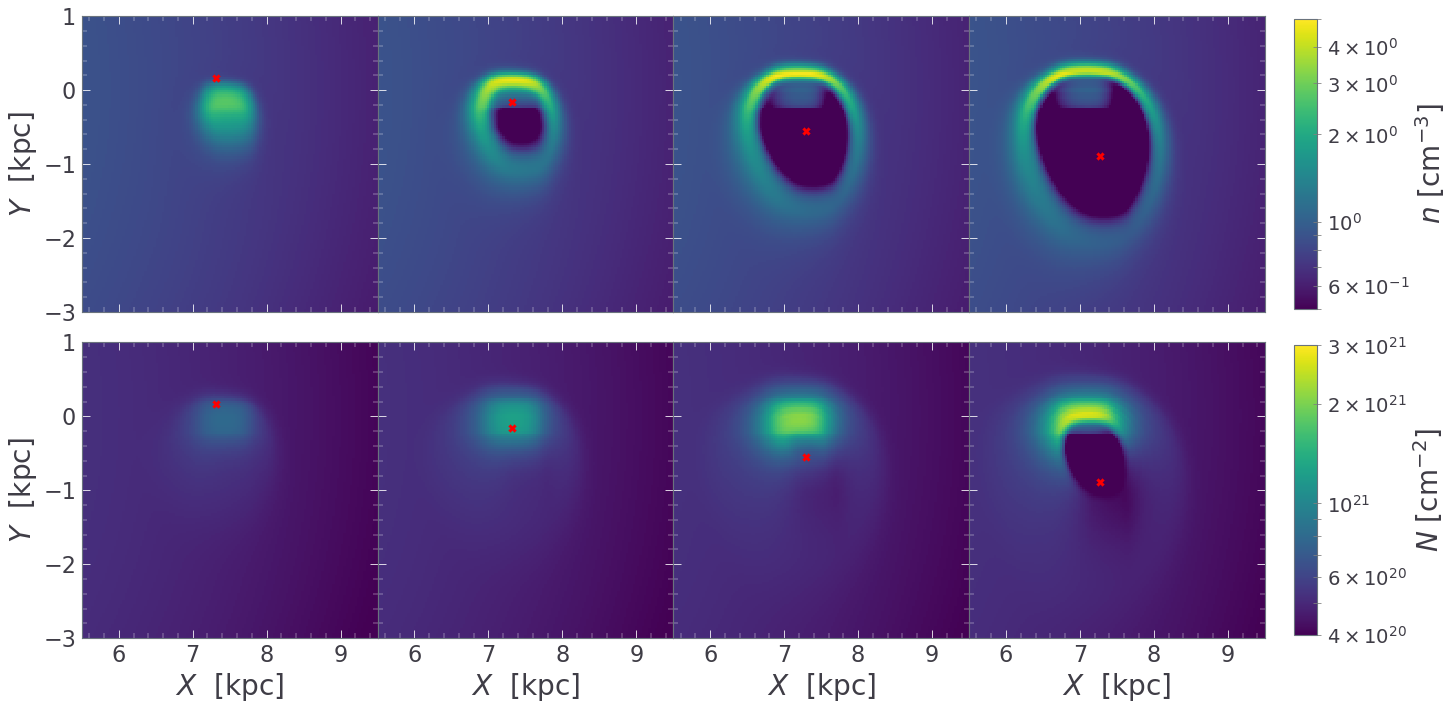

In [15]:
fig,axs = plt.subplots(2,4,figsize=(20,10),constrained_layout=True,sharey='row',sharex='col')
axsf = axs.flat
for i in range(len(axsf)/2):
    im = axsf[i].imshow(a_zz[i],extent=a_extentto[i],vmin=a_zlims[0], vmax=a_zlims[1],origin='lower',norm=LogNorm())
    axsf[i].scatter(xv_LSRs[i][0:1],xv_LSRs[i][1:2],color="red", marker="X",s=65)
    if i==0:
        #axsf[i].set_xlabel(a_xlab,fontsize=fontsize)
        axsf[i].set_ylabel(a_ylab,fontsize=fontsize)
        
    axsf[i].set_xlim(a_xlims[0],a_xlims[1])
    axsf[i].set_ylim(a_ylims[0],a_ylims[1])
    axsf[i].tick_params(which='major',direction='in',right=True,top=True,length=8,labelsize=fontsize*.8,color='white')
    axsf[i].minorticks_on()
    axsf[i].tick_params(which='minor',direction='in',right=True,top=True,length=5,color='white')


cbar = fig.colorbar(im, ax=axs[0, :], shrink=shrink, location='right')
cbar.set_label(a_zlab1, rotation=90,fontsize=fontsize)
cbar.ax.tick_params(labelsize=fontsize*.7,rotation=0,size=8,direction='inout',color='grey',which="major")

a_zz = [sum([op.dd[z,:,:] for z in range(op.nz/2-4,op.nz/2+4)])*delta_grid*mt.C.kpc.express(mt.C.cm) for op in ops]
a_zlims = (40e19,3e21)

for i in range(len(axsf)/2):
    im = axsf[i+4].imshow(a_zz[i],extent=a_extentto[i],vmin=a_zlims[0], vmax=a_zlims[1],origin='lower',norm=LogNorm())
    axsf[i+4].scatter(xv_LSRs[i][0:1],xv_LSRs[i][1:2],color="red", marker="X",s=65)
    if i ==0:
        
        axsf[i+4].set_ylabel(a_ylab,fontsize=fontsize)
    axsf[i+4].set_xlabel(a_xlab,fontsize=fontsize)
    axsf[i+4].set_xlim(a_xlims[0],a_xlims[1])
    axsf[i+4].set_ylim(a_ylims[0],a_ylims[1])
    axsf[i+4].tick_params(which='major',direction='in',right=True,top=True,length=8,labelsize=fontsize*.8,color='white')
    axsf[i+4].minorticks_on()
    axsf[i+4].tick_params(which='minor',direction='in',right=True,top=True,length=5,color='white')


cbar = fig.colorbar(im, ax=axs[1, :], shrink=shrink, location='right')
cbar.set_label(a_zlab2, rotation=90,fontsize=fontsize)
cbar.ax.tick_params(labelsize=fontsize*.7,rotation=0,size=8,direction='inout',color='grey',which="major")
fig.set_constrained_layout_pads(w_pad=0, h_pad=0, hspace=-.1, wspace=0)
fig.savefig("densidades 11-14.pdf", format='pdf',bbox_inches='tight')
plt.show()

In [5]:
op10=mt.rop(op=10,limits=(0.6,.85,0.375,0.625,0.375,0.625))

Computing hilbert minimal domain description for output 10 ...
Done !

 Succesfully read the output file 10. 

Computing hilbert minimal domain description for output 11 ...
Done !


In [9]:
t0 = op10.deltat_forward*mt.C.s.express(mt.C.Myr)

In [8]:
tt = np.array([ 3.25060325,  4.7216629 ,  6.45561442,  7.98573204,  9.55898311,11.13404672]) #de marbles...
delta_tt = np.diff(tt)

In [17]:
print("".join(["$"+str(np.round(t,decimals=1))+"\Myr$, " for t in tt-t0]))

$1.6\Myr$, $3.1\Myr$, $4.8\Myr$, $6.3\Myr$, $7.9\Myr$, $9.5\Myr$, 


In [18]:
pwd

u'/fs/nas14/other0/cbenitez/Notebooks/figs'